In [ ]:
import json
import pandas as pd
import numpy as np
import re

In [ ]:
with open(r'C:\Users\user\Eyecon\Eyecon\make_metadata\final_metadata.json') as json_file:
    meta = json.load(json_file)

In [ ]:
#with open('C:/Users/sodaus/Desktop/Eyecon-master/make_metadata/metadata_ver345_useful.json') as json_file:
 #   meta = json.load(json_file)
    
meta_df = pd.DataFrame()
meta_df['frame_name'] = list(x['video_name'].split('.')[0]+'_frame'+str(x['frame_num']) for x in meta['data'])
meta_df['subject'] = list(''.join(re.compile('[A-Z]').findall(x['subject'])) for x in meta['data'])
meta_df['head_pose_pitch'] = list(float(list(x['head_pose'].values())[0]) for x in meta['data'])
meta_df['head_pose_yaw'] = list(float(list(x['head_pose'].values())[1]) for x in meta['data'])
meta_df['head_pose_roll'] = list(float(list(x['head_pose'].values())[2]) for x in meta['data'])
#meta_df['head_pose'] = list([(np.array(list(x['head_pose'].values())).astype('float')) for x in meta['data']])
meta_df['face_landmarks'] = list([(x['face_landmarks']) for x in meta['data']])
meta_df['faceimg_name'] = list(x['faceimg_name'] for x in meta['data'])
meta_df['lefteyeimg_name'] = list(x['eyeimg_name'][0] for x in meta['data'])
meta_df['righteyeimg_name'] = list(x['eyeimg_name'][1] for x in meta['data'])
meta_df['label'] = list(x['label'] for x in meta['data'])

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13563 entries, 0 to 13562
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frame_name        13563 non-null  object 
 1   subject           13563 non-null  object 
 2   head_pose_pitch   13563 non-null  float64
 3   head_pose_yaw     13563 non-null  float64
 4   head_pose_roll    13563 non-null  float64
 5   face_landmarks    13563 non-null  object 
 6   faceimg_name      13563 non-null  object 
 7   lefteyeimg_name   13563 non-null  object 
 8   righteyeimg_name  13563 non-null  object 
 9   label             13563 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [ ]:
meta_df

,frame_name,subject,head_pose_pitch,head_pose_yaw,head_pose_roll,face_landmarks,faceimg_name,lefteyeimg_name,righteyeimg_name,label
0,0_ASW_frame0,ASW,2.125730,19.042382,-5.182933,"[[288, 248], [287, 265], [287, 282], [290, 298...",0_ASW_frame0_face.jpg,0_ASW_frame0_eye_left.jpg,0_ASW_frame0_eye_right.jpg,0
1,0_ASW_frame1,ASW,2.686390,18.510065,-8.522907,"[[303, 250], [301, 267], [302, 285], [305, 301...",0_ASW_frame1_face.jpg,0_ASW_frame1_eye_left.jpg,0_ASW_frame1_eye_right.jpg,0
2,0_ASW_frame2,ASW,3.143057,21.237756,-10.432257,"[[313, 258], [310, 273], [308, 289], [309, 304...",0_ASW_frame2_face.jpg,0_ASW_frame2_eye_left.jpg,0_ASW_frame2_eye_right.jpg,0
3,0_ASW_frame3,ASW,3.037692,21.580079,-13.670988,"[[307, 257], [305, 274], [304, 291], [304, 308...",0_ASW_frame3_face.jpg,0_ASW_frame3_eye_left.jpg,0_ASW_frame3_eye_right.jpg,0
4,0_ASW_frame4,ASW,2.076509,21.283782,-12.232439,"[[304, 262], [302, 277], [302, 292], [304, 306...",0_ASW_frame4_face.jpg,0_ASW_frame4_eye_left.jpg,0_ASW_frame4_eye_right.jpg,0
...,...,...,...,...,...,...,...,...,...,...
13558,1_UTH_frame353,UTH,2.781556,7.739024,2.900394,"[[197, 206], [200, 230], [204, 254], [210, 275...",1_UTH_frame353_face.jpg,1_UTH_frame353_eye_left.jpg,1_UTH_frame353_eye_right.jpg,1
13559,1_UTH_frame354,UTH,2.806877,7.247055,2.345390,"[[215, 185], [217, 208], [222, 229], [227, 249...",1_UTH_frame354_face.jpg,1_UTH_frame354_eye_left.jpg,1_UTH_frame354_eye_right.jpg,1
13560,1_UTH_frame355,UTH,3.112830,6.500977,2.256681,"[[222, 189], [225, 212], [229, 234], [234, 254...",1_UTH_frame355_face.jpg,1_UTH_frame355_eye_left.jpg,1_UTH_frame355_eye_right.jpg,1
13561,1_UTH_frame356,UTH,2.108351,6.759132,1.863340,"[[222, 188], [224, 211], [228, 234], [233, 256...",1_UTH_frame356_face.jpg,1_UTH_frame356_eye_left.jpg,1_UTH_frame356_eye_right.jpg,1


# 탐색적 자료 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import inspect
from scipy import stats
from patsy import dmatrices
from scipy.stats import kde
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ranksums
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols

## Number of data per Subjects

In [ ]:
meta_df['label'] = meta_df['label'].astype('str')

In [ ]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

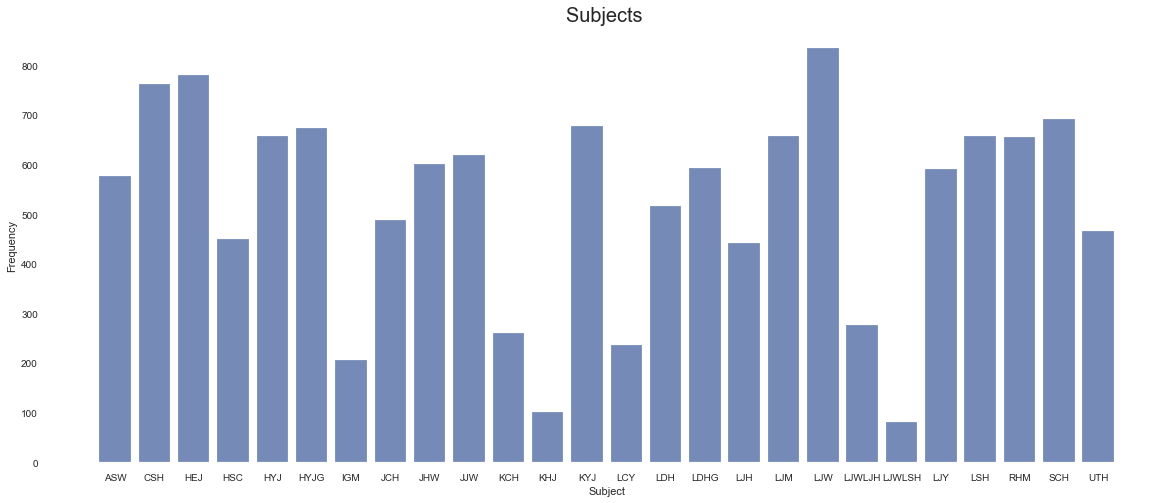

In [ ]:
#k_y = rgb_to_hex(250, 255, 0)
#k_b = rgb_to_hex(150, 75, 0)
plt.figure(figsize=(20, 8))
plt.bar(sorted(meta_df['subject'].unique()), meta_df['subject'].value_counts().sort_index(), facecolor=rgb_to_hex(59, 89, 152), alpha=0.7)
plt.title('Subjects ', fontsize=20)
plt.xlabel('Subject')
_ = plt.ylabel('Frequency')

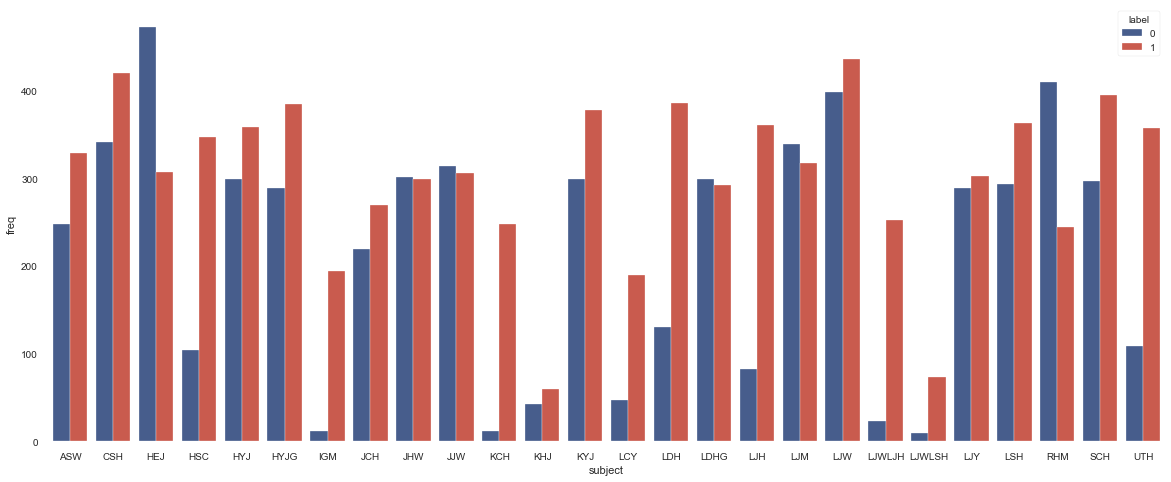

In [ ]:
k_y = rgb_to_hex(59, 89, 152)
k_b = rgb_to_hex(221, 75, 57)
my_colors = {'0': k_y, '1': k_b}

tmp = meta_df.groupby(['label', 'subject']).size().reset_index(name='freq')
# tmp['cum_freq'] = tmp.groupby('subject')['freq'].cumsum(axis=0)
# tmp = tmp.sort_values(by=['subject', 'label'], ascending=False)

plt.figure(figsize=(20, 8))
_ = sns.barplot(x='subject', y='freq', hue='label', data=tmp, palette=my_colors)
# sns.barplot(x='subject', y='cum_freq', hue='label', data=tmp, palette=my_colors, dodge=False)

## Number of data per label

0    5685
1    7878
Name: label, dtype: int64


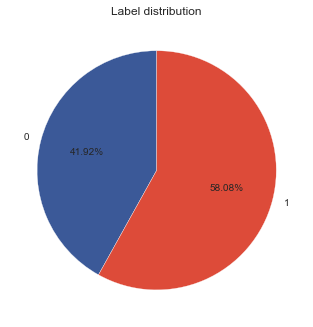

In [ ]:
print(meta_df['label'].value_counts().sort_index())

plt.pie(meta_df['label'].value_counts().sort_index(), 
        labels=sorted(meta_df['label'].unique()),
        colors=[k_y, k_b],
        startangle=90,
        autopct='%1.2f%%')
_ = plt.title('Label distribution')



* Label 0: 41.92%(5685장)
* Label 1: 58.08%(7878장)
* Label 1이 0보다 약 15% 더 많다.

#  Numerical Data EDA - Headpose

In [ ]:
meta_headpose = meta_df[["head_pose_pitch", "head_pose_yaw", "head_pose_roll"]]

In [ ]:
ProfileReport(meta_headpose, minimal=True)

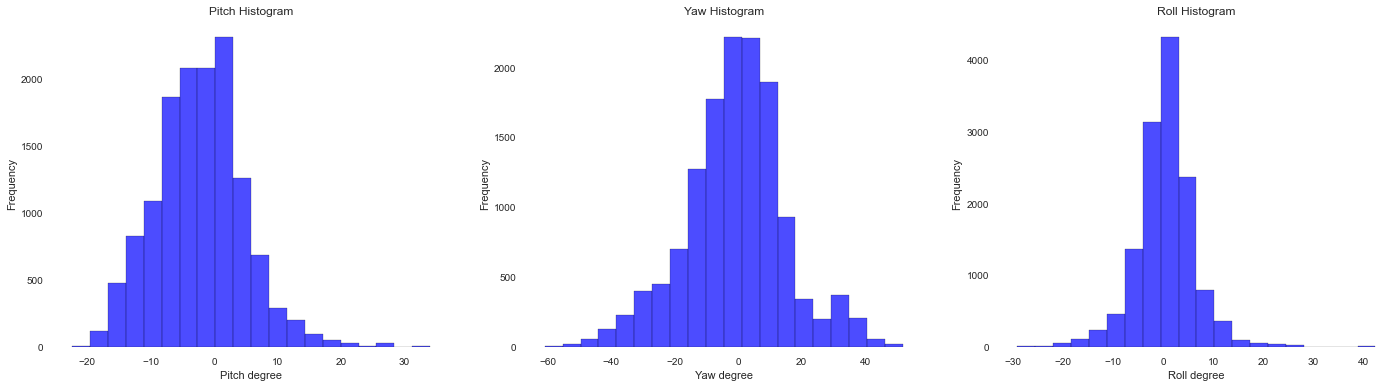

In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
x = meta_df['head_pose_pitch']
plt.hist(x, bins=20, facecolor='blue', alpha=0.7, edgecolor='black')  # or edgecolor='red'
plt.title('Pitch Histogram')
plt.xlabel('Pitch degree')
_ = plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
x = meta_df['head_pose_yaw']
plt.hist(x, bins=20, facecolor='blue', alpha=0.7, edgecolor='black')  # or edgecolor='red'
plt.title('Yaw Histogram')
plt.xlabel('Yaw degree')
_ = plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
x = meta_df['head_pose_roll']
plt.hist(x, bins=20, facecolor='blue', alpha=0.7, edgecolor='black')  # or edgecolor='red'
plt.title('Roll Histogram')
plt.xlabel('Roll degree')
_ = plt.ylabel('Frequency')

* Pitch, Yaw, Roll의 통계치와 히스토그램

<ipython-input-305-e177d39b8c1d>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


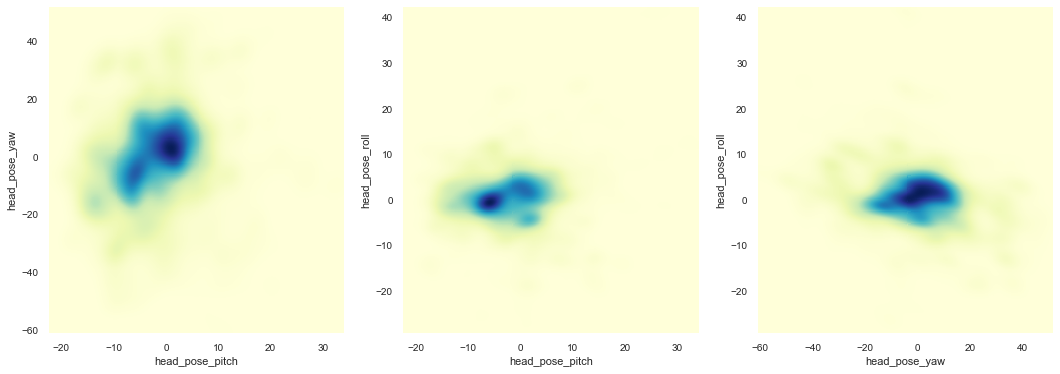

In [ ]:
def plot_colormesh(x, y, nbins, cmap, data):
  x_name, y_name = x.split('_')[-1], y.split('_')[-1]

  x, y = data[x], data[y]

  k = kde.gaussian_kde([x, y])
  xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
  zi = k(np.vstack([xi.flatten(), yi.flatten()]))
  
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)
plt.cm
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_colormesh(x='head_pose_pitch', y='head_pose_yaw', nbins=300, cmap=plt.cm.YlGnBu, data=meta_df)
plt.xlabel('head_pose_pitch')
plt.ylabel('head_pose_yaw')

plt.subplot(1, 3, 2)
plot_colormesh(x='head_pose_pitch', y='head_pose_roll', nbins=300, cmap=plt.cm.YlGnBu, data=meta_df)
plt.xlabel('head_pose_pitch')
plt.ylabel('head_pose_roll')

plt.subplot(1, 3, 3)
plot_colormesh(x='head_pose_yaw', y='head_pose_roll', nbins=300, cmap=plt.cm.YlGnBu, data=meta_df)
plt.xlabel('head_pose_yaw')
plt.ylabel('head_pose_roll')

plt.show()

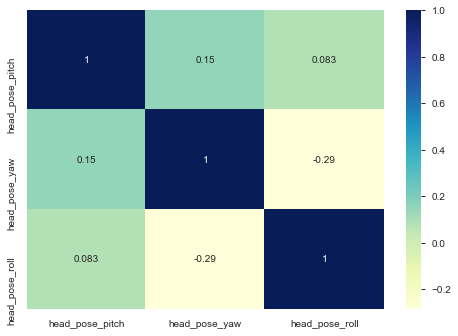

In [ ]:
_ = sns.heatmap(meta_df[['head_pose_pitch', 'head_pose_yaw', 'head_pose_roll']].corr(),
                annot=True,
                cmap='YlGnBu')

Head pose - pitch, yaw, roll 값의 관계

* 더 구체적으로 알아보기 위해 correlation matrix를 히트맵으로 표현함
* 위 2D density plot에서 살펴본대로 yaw와 roll의 상관계수는 -0.29로 약한 음의 상관관계를 가짐

        count  mean   std    min    25%   50%   75%    max
label                                                     
0      5685.0 -3.50  9.09 -22.39 -10.80 -4.23  1.37  34.02
1      7878.0 -1.26  4.93 -13.80  -5.29 -1.01  2.25  18.01 

        count  mean    std    min    25%   50%   75%    max
label                                                      
0      5685.0 -3.58  21.13 -61.02 -18.15 -4.46  8.99  51.87
1      7878.0  1.26  10.49 -39.91  -5.62  1.76  8.58  36.93 

        count  mean   std    min   25%   50%   75%    max
label                                                    
0      5685.0  0.99  7.61 -29.21 -2.91  1.03  4.56  42.35
1      7878.0  0.15  4.68 -27.98 -2.13  0.28  2.53  25.58


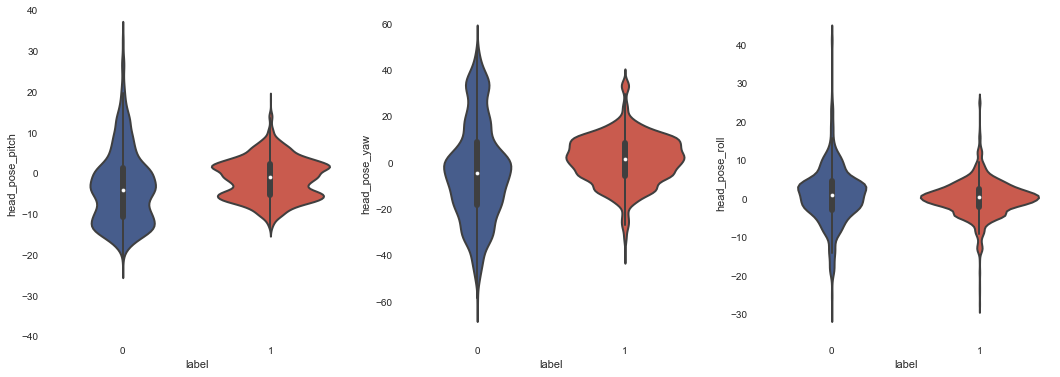

In [ ]:
print(np.round(meta_df.groupby('label')['head_pose_pitch'].describe(), 2), '\n')
print(np.round(meta_df.groupby('label')['head_pose_yaw'].describe(), 2), '\n')
print(np.round(meta_df.groupby('label')['head_pose_roll'].describe(), 2))

my_colors = {'0': k_y, '1': k_b}

# plot violinplot of pitch
tmp_df = meta_df.copy()
tmp_df['label'] = tmp_df['label'].astype('str')

f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.violinplot(data=tmp_df, x="label", y="head_pose_pitch", linewidth=2, palette=my_colors, ax=axes[0])
axes[0].set(ylim=(-40, 40))
sns.violinplot(data=tmp_df, x="label", y="head_pose_yaw", linewidth=2, palette=my_colors, ax=axes[1])
_ = sns.violinplot(data=tmp_df, x="label", y="head_pose_roll", linewidth=2, palette=my_colors, ax=axes[2])

화면을 보지 않는 그룹(label 0)과 화면을 보는 그룹(label 1) 간의 Head pose 차이

* 두 그룹 간에 pitch, yaw, roll 값이 차이가 있는지 살펴보기 위해 violin plot을 그림
* pitch와 yaw는 두 그룹 사이에 차이가 있는 것으로 보임
* roll은 두 그룹 사이에 차이가 없는 것으로 보임

#  Statistical Hypothesis Testing

In [ ]:
meta_int = meta_df.astype({'label': object, 'label': int})

In [ ]:
meta_int

,frame_name,subject,head_pose_pitch,head_pose_yaw,head_pose_roll,face_landmarks,faceimg_name,lefteyeimg_name,righteyeimg_name,label
0,0_ASW_frame0,ASW,2.125730,19.042382,-5.182933,"[[288, 248], [287, 265], [287, 282], [290, 298...",0_ASW_frame0_face.jpg,0_ASW_frame0_eye_left.jpg,0_ASW_frame0_eye_right.jpg,0
1,0_ASW_frame1,ASW,2.686390,18.510065,-8.522907,"[[303, 250], [301, 267], [302, 285], [305, 301...",0_ASW_frame1_face.jpg,0_ASW_frame1_eye_left.jpg,0_ASW_frame1_eye_right.jpg,0
2,0_ASW_frame2,ASW,3.143057,21.237756,-10.432257,"[[313, 258], [310, 273], [308, 289], [309, 304...",0_ASW_frame2_face.jpg,0_ASW_frame2_eye_left.jpg,0_ASW_frame2_eye_right.jpg,0
3,0_ASW_frame3,ASW,3.037692,21.580079,-13.670988,"[[307, 257], [305, 274], [304, 291], [304, 308...",0_ASW_frame3_face.jpg,0_ASW_frame3_eye_left.jpg,0_ASW_frame3_eye_right.jpg,0
4,0_ASW_frame4,ASW,2.076509,21.283782,-12.232439,"[[304, 262], [302, 277], [302, 292], [304, 306...",0_ASW_frame4_face.jpg,0_ASW_frame4_eye_left.jpg,0_ASW_frame4_eye_right.jpg,0
...,...,...,...,...,...,...,...,...,...,...
13558,1_UTH_frame353,UTH,2.781556,7.739024,2.900394,"[[197, 206], [200, 230], [204, 254], [210, 275...",1_UTH_frame353_face.jpg,1_UTH_frame353_eye_left.jpg,1_UTH_frame353_eye_right.jpg,1
13559,1_UTH_frame354,UTH,2.806877,7.247055,2.345390,"[[215, 185], [217, 208], [222, 229], [227, 249...",1_UTH_frame354_face.jpg,1_UTH_frame354_eye_left.jpg,1_UTH_frame354_eye_right.jpg,1
13560,1_UTH_frame355,UTH,3.112830,6.500977,2.256681,"[[222, 189], [225, 212], [229, 234], [234, 254...",1_UTH_frame355_face.jpg,1_UTH_frame355_eye_left.jpg,1_UTH_frame355_eye_right.jpg,1
13561,1_UTH_frame356,UTH,2.108351,6.759132,1.863340,"[[222, 188], [224, 211], [228, 234], [233, 256...",1_UTH_frame356_face.jpg,1_UTH_frame356_eye_left.jpg,1_UTH_frame356_eye_right.jpg,1


In [ ]:
label_1 = meta_int[meta_int["label"] > 0]
label_0 = meta_int[meta_int["label"] == 0]

In [ ]:
pl0 = label_0["head_pose_pitch"]
pl1 = label_1["head_pose_pitch"]
py0 = label_1["head_pose_yaw"]
py1 = label_0["head_pose_yaw"]
pr0 = label_1["head_pose_roll"]
pr1 = label_0["head_pose_roll"]

## Hypothesis Setting

귀무가설(H_0) : label0에서와 label1에서의 head_pose에서 'pitch', 'yaw', 'roll' 각각의 평균값의 차이가 있다고 할 수 없다

대립가설(H_1) : Not H_0

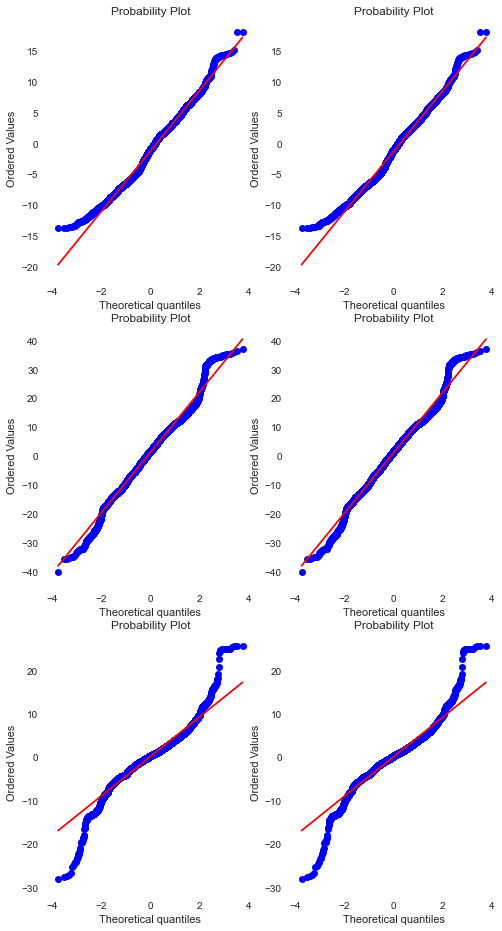

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 16))
#plt.figure(figsize=(16,16))
plt.subplot(321)
stats.probplot(pl0, plot=plt)
plt.subplot(322)
stats.probplot(pl1, plot=plt)
plt.subplot(323)
stats.probplot(py0, plot=plt)
plt.subplot(324)
stats.probplot(py1, plot=plt)
plt.subplot(325)
stats.probplot(pr0, plot=plt)
plt.subplot(326)
stats.probplot(pr1, plot=plt)
plt.show()

위 qqplot은 데이터의 분위수(quantile)와 특정 이론적 분포의 quantile각각을 구하여 삱점도로 나타낸 그림이다. qqplot의 점들이 기울기의 직선상에 놓이면 자료가 해당 분포를 잘따른다고 할 수 있다. 위의 qqplot에서는 dataset의 점들이 선을 따라서 잘 붙어있다고 보기 어려움으로 정규성을 만족한다고 보기 어렵다.

In [ ]:
shapiro_pl = [shapiro(pl0), shapiro(pl1)]
print("Shapiro_test_pitch = " + str(shapiro_pl))
shapiro_py = [shapiro(py0), shapiro(py1)]
print("Shapiro_test_yaw = " + str(shapiro_py))
shapiro_pr = [shapiro(pr0), shapiro(pr1)]
print("Shapiro_test_roll = " + str(shapiro_pr))


Shapiro_test_pitch = [(0.9896267056465149, 1.403166298094882e-23), (0.9896267056465149, 1.403166298094882e-23)]
Shapiro_test_yaw = [(0.9892792105674744, 5.800174747423485e-24), (0.9892792105674744, 5.800174747423485e-24)]
Shapiro_test_roll = [(0.9449267387390137, 0.0), (0.9449267387390137, 0.0)]


C:\Anaconda\envs\Newproject\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


shapiro wilk test결과 qqplot그래프의 결과와 같이 p-value값이 매우 작아 정규성을 만족한다고 보기 어려운 것을 알 수 있다.

위의 qqplot과 shapiro wilk test결과를 통하여 두 집단(label0, label1)모두 정규성을 만족한다고 볼 수 없으므로 
모수적 방법인 t검정 대신 비모수적 방법인 윌콕슨 순위합 검정(wilcoxon rank sum test)
을 하는것이 적합하다고 볼 수 있다.  

In [ ]:
print("wilcoxon_rank_sum_test_pitch = " + str(ranksums(pl0, pl1)))
print("wilcoxon_rank_sum_test_yaw = " + str(ranksums(py0, py1)))
print("wilcoxon_rank_sum_test_roll = " + str(ranksums(pr0, pr1)))

wilcoxon_rank_sum_test_pitch = RanksumsResult(statistic=-23.547820165391098, pvalue=1.3216012902102662e-122)
wilcoxon_rank_sum_test_yaw = RanksumsResult(statistic=20.484559871080645, pvalue=2.956438173827247e-93)
wilcoxon_rank_sum_test_roll = RanksumsResult(statistic=-8.598026003000626, pvalue=8.10989264572072e-18)


윌콕슨 순위합 검정(wilcoxon ranksum test)를 수행해본 결과 위 처럼 p-value값이 유의수준 0.05에서 귀무가설(H_0)을 기각하는 것을 알 수 있다.